![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Text Extraction: An Introduction

Extracting text of various sizes, shapes, and orientations from images is an essential problem in many contexts, especially in e-commerce, augmented reality assistance systems, and content moderation in social media platforms. To tackle this problem, one needs to accurately extract the text from images.

Basically, text extraction can be achieved in two methods:

- Two step process, i.e., text detection and text recognition
- Single step process, i.e., by training a single model to achieve both text detection and recognition.

We will be focusing on the Two step method here.

1. **Text detection** helps identify the region in the image where the text is present.  It takes in an image as an input, and outputs the bounding boxes.

2. **Text recognition** extracts the text from the input image using the bounding boxes obtained from the text detection model. It takes in an image and some bounding boxes as inputs and outputs some raw text.

Mostly, the text detection methods can be broadly classified into 2 categories:

- Conventional methods
- Deep Learning based methods

Conventional methods rely on manually designed features. For instance, Stroke width Transform (SWT) and Maximally Stable Extremal Regions (MSER) based methods generally extracts the character candidates via edge detection or extremal region extraction.

In the deep learning based methods, features are learned from the training data. These are generally better than the conventional ones, in terms of both accuracy and adaptability in challenging scenarios. Connectionist Text Proposal Network (CTPN) and Efficient and Accurate Scene Text Detector (EAST) are very famous Deep Learning based text detection methods.

For text detection, you can use any of the techniques mentioned above based on the complexity of the use case that you have in hand.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Text Recognition Pipeline

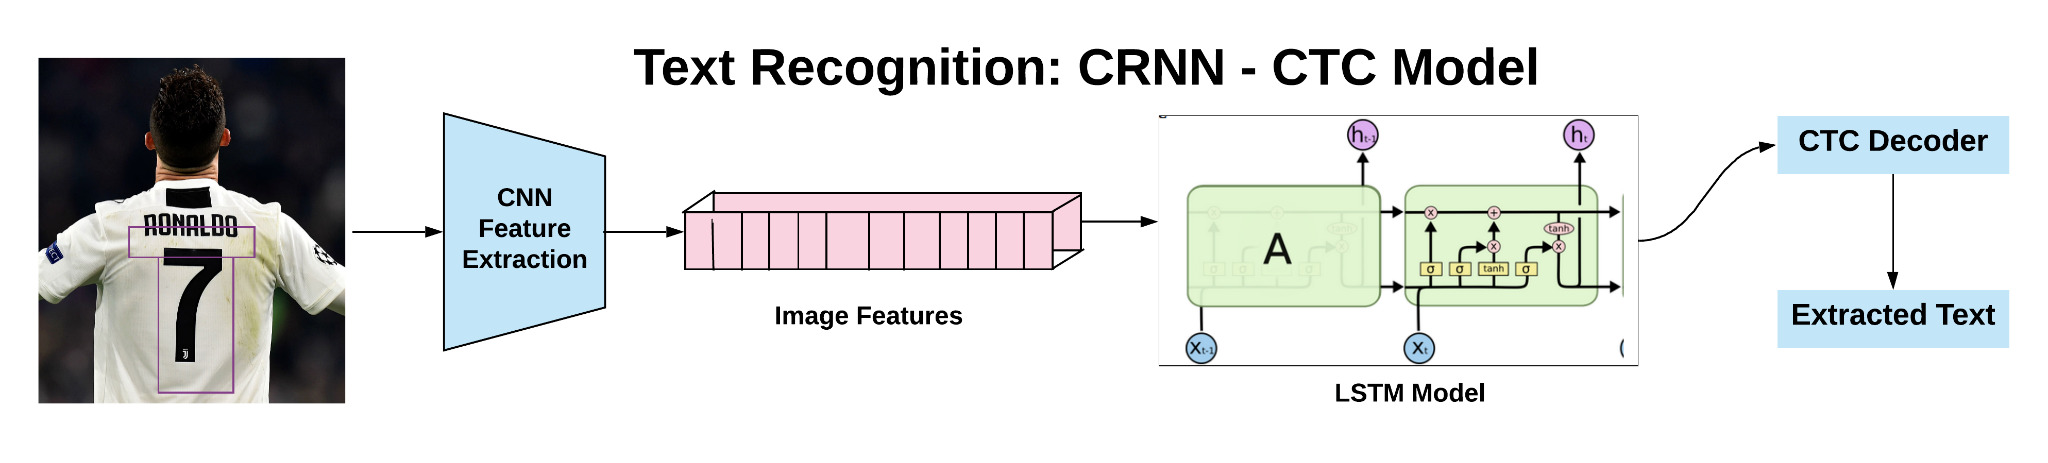

In [1]:
# Text Recognition Pipeline

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-01.jpg")

After the text detection step, regions, where the text is present, are cropped and sent through convolutional layers to get the features from the image. Later these features are fed to many-to-many LSTM architecture, which outputs softmax probabilities over the vocabulary. These outputs from different time steps are fed to the CTC decoder to finally get the raw text from images.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Receptive Fields

The receptive field is defined as the region in the input image/space that a particular CNN's feature is looking at.

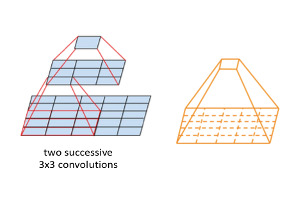

In [2]:
# Receptive Fields

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-02.jpg")

Let us say we have an input image of the shape 5 x 5 and a filter 3 x 3.  As seen from the above image, after applying a filter on the input image, the feature map's value has visibility on the 3 x 3 patch of the image.  If we move to the second layer, 3 x 3  filter is applied on the feature map, and we get a single value which is nothing but the feature map. This value has visibility on the entire image now.  So the trend is, feature maps closer to the input images have lower receptive fields, and as we move towards the final layers in any task, the receptive field increases.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. CNN Features to LSTM Model

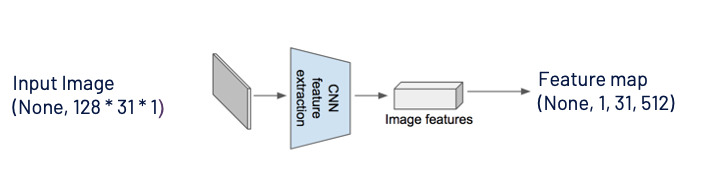

In [3]:
# CNN Features to LSTM Model

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-03.jpg")

As seen from the above image, a grayscale image with width 128 and height 32 is sent through a series of convolutional & max-pooling layers.  Layers are designed in such a manner that we obtain feature maps of the shape **(None, 1, 31, 512)**.  "None" here is nothing but the batch size which could take any value.

**(None, 1, 31, 512)** can be easily reshaped to **(None, 31,  512)**, and 31 corresponds to the number of time steps, and 512 is nothing but the number of features at every time step.  One can relate this to training any LSTM model with word embeddings like word2vec, Glove, fastText, and the input shape is usually like **(batch_size, no_time_steps, word_embedding_dimension).**

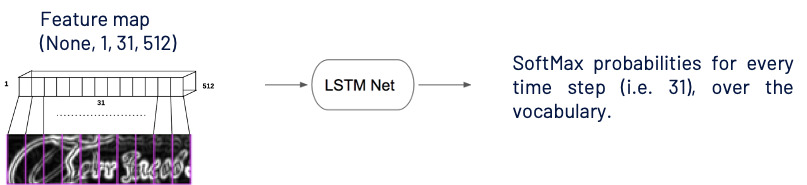

In [4]:
# CNN Features to LSTM Model

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-04.jpg")

Later these feature maps are fed to the LSTM model, as shown above.  You might be thinking now that LSTM models are known to work with sequential data and how feature maps are sequential. Receptive fields play a significant role here. As one can see from the above image, first value (first row, first column) in the feature map has visibility on the left part of the input image and last value (first row, last column) has visibility on the end part of the image. Hence, this is sequential.

From the LSTM model for every time step i.e., 31, we get a softmax probability over vocabulary.  Now we can calculate the loss value for this architecture setup.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Calculating Loss

Consider the following input image:

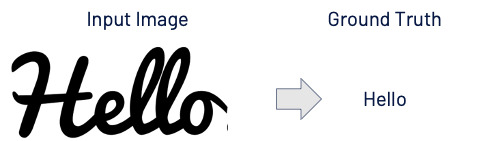

In [1]:
# Input image

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-05.jpg")

The output of LSTM model for 31 timesteps is as below:

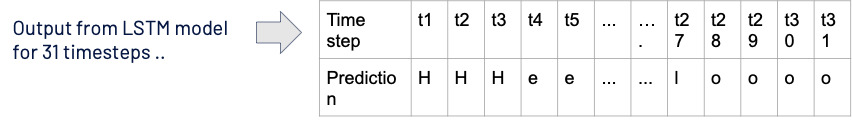

In [2]:
# Output of LSTM model for 31 timesteps

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-06.jpg")

The length of ground truth is 5, which is not equal to the length of prediction i.e., 31.

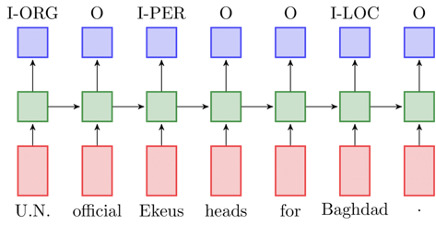

In [3]:
# NER Task

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-07.jpg")

If we had ground truth for every time-step like the Named Entity Recognition(NER) task shown above, we could have used categorical cross-entropy as a loss. In the text recognition task, since we do not have ground truth for all the time steps i.e., 31, we cannot use cross-entropy loss.

Above mentioned scenario holds good for speech to text application as well.  Audio signal and corresponding text are available as training data, and there is no mapping like the first character is spoken for "x" milliseconds or from "x1" to "x2" milliseconds character "z" is spoken.

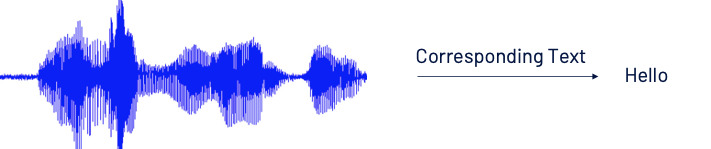

In [4]:
# Input audio

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-08.jpg")

Can we manually align each character to its location in the image /audio input?
The answer is yes. However, much manual effort is involved in creating training data. Forget about training a deep learning model that is always data hungry!
How do we calculate loss then? 🤔

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. CTC (Connectionist Temporal Classification) to the Rescue

With just the mapping of the image to text and not worrying about the alignment of each character to the input image's location, one should be able to calculate the loss and train the network. Before moving on to calculating CTC loss, lets first understand the CTC decode operation.

## 1. CTC Decode Operation

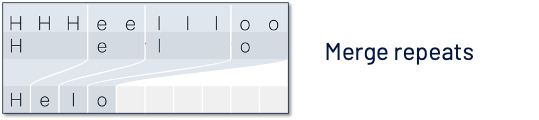

In [5]:
# Merge repeats

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-09.jpg")

If we merge the repeats, we lose the repetitions, as shown in the above image.  With just merging, we end up with a single letter "l," which was supposed to be "ll." So a special character called "blank character" is introduced to avoid this.

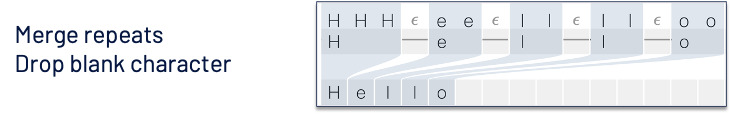

In [6]:
# Merge repeats, Drop blank character

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-10.jpg")

Now the decode operation consists of 2 steps:

1. Merge repeats

2. Remove blank characters

Now you can see "ll," which is retained.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)